In [ ]:
import pandas as pd
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# load data
data = pd.read_excel('Data.xlsx')

In [ ]:
# list of companies in the data
companies = data['Company_Name'].unique()

In [ ]:
# dictionary to store RMSE for each company
rmse_dict = {}

In [ ]:
# loop over companies
for company in companies:
  print(company)

Apple
Microsoft


In [ ]:
# extract data for the current company
data_company = data[data['Company_Name'] ==company ]

In [ ]:
 # rename columns for prophet
data_company = data_company.rename(columns={'Date': 'ds', 'Close': 'y'})

In [ ]:
 # split data into training and testing sets
train_size = int(len(data_company) * 0.8)
train_data, test_data = data_company[:train_size], data_company[train_size:]

In [ ]:
#from prophet.plot import plot_plotly,plot_components_plotly
from prophet import Prophet

In [ ]:
 # create and fit model
model = Prophet()
model.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx_o8ty/6ok0uhfw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx_o8ty/2j64l8uu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41740', 'data', 'file=/tmp/tmp7rx_o8ty/6ok0uhfw.json', 'init=/tmp/tmp7rx_o8ty/2j64l8uu.json', 'output', 'file=/tmp/tmp7rx_o8ty/prophet_modelpcg3eeas/prophet_model-20230428131132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:11:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx_o8ty/ls7bb57b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx_o8ty/ax15coxz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43364', 'data', 'file=/tmp/tmp7rx_o8ty/ls7bb57b.json', 'init=/tmp/tmp7rx_o8ty/ax15coxz.json', 'output', 'file=/tmp/tmp7rx_o8ty/prophet_model235qvaj0/prophet_model-20230428131459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


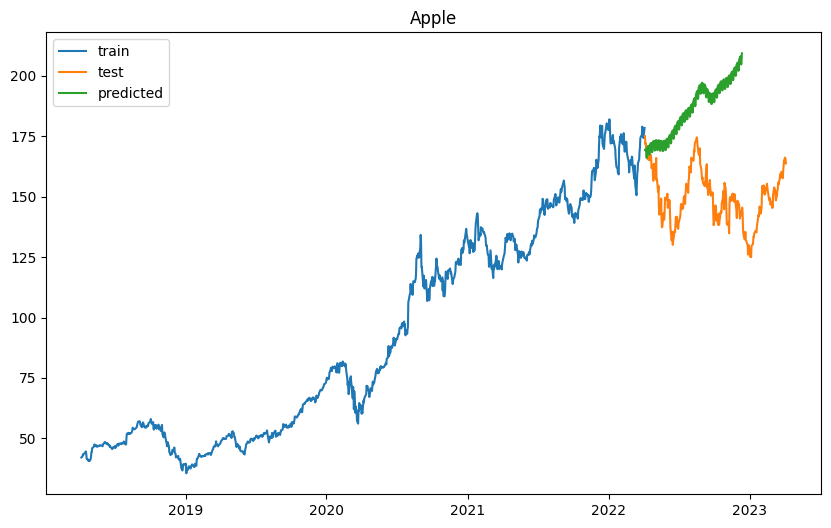

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx_o8ty/82_7yc_z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx_o8ty/p7_lvyr6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93480', 'data', 'file=/tmp/tmp7rx_o8ty/82_7yc_z.json', 'init=/tmp/tmp7rx_o8ty/p7_lvyr6.json', 'output', 'file=/tmp/tmp7rx_o8ty/prophet_modelnmlgdw9e/prophet_model-20230428131459.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


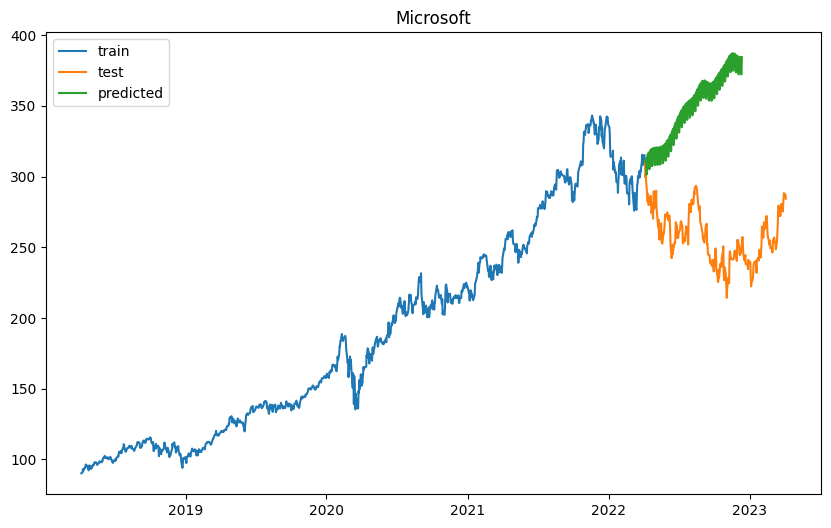

In [ ]:
# loop over companies
for company in companies:

    # extract data for the current company
    data_company = data[data['Company_Name'] == company]

    # rename columns for prophet
    data_company = data_company.rename(columns={'Date': 'ds', 'Close': 'y'})

    # split data into training and testing sets
    train_size = int(len(data_company) * 0.8)
    train_data, test_data = data_company[:train_size], data_company[train_size:]

    # create and fit model
    model = Prophet()
    model.fit(train_data)

    # make predictions on testing data
    future = model.make_future_dataframe(periods=len(test_data))
    y_pred = model.predict(future)[['ds', 'yhat']].tail(len(test_data))

    # calculate RMSE
    rmse = mean_squared_error(test_data['y'], y_pred['yhat'], squared=False)
    rmse_dict[company] = rmse

    # plot future predictions
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['ds'], train_data['y'], label='train')
    plt.plot(test_data['ds'], test_data['y'], label='test')
    plt.plot(y_pred['ds'], y_pred['yhat'], label='predicted')
    plt.title(company)
    plt.legend()
    plt.show()

In [ ]:
# print RMSE for each company
for company, rmse in rmse_dict.items():
    print(f'RMSE for {company}: {rmse}')

RMSE for Microsoft: 98.76843545131881
